## Note the nomenclature "Experiment 3A" corresponds to a previous iteration of the manuscript. The following code will reproduce Figure 4 and Table 6 in Thomas, Jauch, and Matteson (2025).

In [1]:
import pickle
import pandas as pd
import numpy as np
import detectda as dtda
import matplotlib.pyplot as plt
from skimage import filters
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sys
from joblib import Parallel, delayed
from scipy.stats import mode

In [2]:
names_exp3A_df = ['cp_bcc', 'bcc_x1', 'bcc_x2', 'bcc_x3', 'bcc_x4', 'bcc_x1sq', 'bcc_x1x2', 'bcc_x1x3',
                  'bcc_x1x4', 'bcc_x2sq', 'bcc_x2x3', 'bcc_x2x4', 'bcc_x3sq', 'bcc_x3x4', 'bccx4sq',
                  'rmse_bcc', 'cp_bccX', 'bcc_x1X', 'bcc_x2X', 'bcc_x3X', 'bcc_x4X', 'bcc_x1sqX', 'bcc_x1x2X', 'bcc_x1x3X',
                  'bcc_x1x4X', 'bcc_x2sqX', 'bcc_x2x3X', 'bcc_x2x4X', 'bcc_x3sqX', 'bcc_x3x4X', 'bccx4sqX',
                  'rmse_bccX', 'cp_cf', 'pval_cf', 'cp_cf_raw', 'pval_cf_raw', 'cp_kcp', 'cp_kcp_raw',
                  'cp_ecp', 'cp_ecp_raw', 'cp_gauss']
                  
exp3A_df = pd.read_table('experimentCOV_data_prior.txt', sep=',', header=None, names=names_exp3A_df, index_col=False)

In [3]:
exp3A_df

,cp_bcc,bcc_x1,bcc_x2,bcc_x3,bcc_x4,bcc_x1sq,bcc_x1x2,bcc_x1x3,bcc_x1x4,bcc_x2sq,...,rmse_bccX,cp_cf,pval_cf,cp_cf_raw,pval_cf_raw,cp_kcp,cp_kcp_raw,cp_ecp,cp_ecp_raw,cp_gauss
0,199.0,0.028624,0.112785,0.071141,0.100434,-0.534224,1.389567,0.269877,0.058313,-0.292145,...,7.951729,202.0,0.005,202.0,0.005,202.0,202.0,206.0,206.0,200.0
1,188.0,-0.138817,-0.119412,-0.091860,-0.142749,-0.314242,1.020459,0.192675,0.285362,-0.234433,...,13.188070,210.0,0.005,210.0,0.005,210.0,190.0,210.0,190.0,208.0
2,193.0,-0.025226,0.092137,0.171954,0.019598,0.101730,1.284428,0.204723,0.276948,-0.352180,...,13.050931,213.0,0.005,213.0,0.005,213.0,207.0,265.0,265.0,212.0
3,194.0,0.096408,-0.138965,0.255099,0.263153,-0.368917,1.057802,0.052004,-0.222506,-0.293988,...,11.417811,192.0,0.005,192.0,0.005,194.0,194.0,194.0,163.0,198.0
4,196.0,0.161769,0.210775,-0.137284,-0.161079,-0.349014,1.084241,0.053500,-0.005053,-0.438036,...,7.446905,223.0,0.165,3.0,0.455,216.0,194.0,61.0,61.0,196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,198.0,-0.103105,0.271875,0.072798,-0.067916,-0.341213,0.914627,0.240812,-0.072947,-0.364928,...,13.368381,243.0,0.005,209.0,0.070,2.0,196.0,85.0,85.0,198.0
2496,194.0,0.124188,-0.071075,-0.145194,-0.060212,-0.012149,1.082785,0.048951,-0.081111,-0.414758,...,8.451225,194.0,0.035,190.0,0.010,5.0,2.0,243.0,3.0,194.0
2497,195.0,-0.051012,0.008422,0.226704,0.164174,0.053450,1.277644,-0.012718,0.011209,-0.311309,...,6.320728,195.0,0.005,161.0,0.010,201.0,194.0,226.0,226.0,198.0
2498,202.0,-0.035941,0.095888,-0.090396,-0.214681,-0.219634,1.053350,0.004838,-0.132211,-0.103425,...,5.912055,202.0,0.005,191.0,0.005,202.0,202.0,238.0,110.0,202.0


In [4]:
print('P. Exact BCLR: %0.3f' % np.mean(exp3A_df['cp_bcc']==200))

print('P. Exact BCLR: %0.3f' % np.mean(exp3A_df['cp_bccX']==200))

print('P. Exact CF: %0.3f' % np.mean(exp3A_df['cp_cf']==200))

print('P. Exact CF RAW: %0.3f' % np.mean(exp3A_df['cp_cf_raw']==200))

print('P. Exact KCP: %0.3f' % np.mean(exp3A_df['cp_kcp']==200))

print('P. Exact KCP RAW: %0.3f' % np.mean(exp3A_df['cp_kcp_raw']==200))

print('P. Exact ECP: %0.3f' % np.mean(exp3A_df['cp_ecp']==200))

print('P. Exact ECP RAW: %0.3f' % np.mean(exp3A_df['cp_ecp_raw']==200))

print('P. Exact GAUSS: %0.3f' % np.mean(exp3A_df['cp_gauss']==200))

P. Exact BCLR: 0.150
P. Exact BCLR: 0.137
P. Exact CF: 0.115
P. Exact CF RAW: 0.066
P. Exact KCP: 0.063
P. Exact KCP RAW: 0.036
P. Exact ECP: 0.018
P. Exact ECP RAW: 0.008
P. Exact GAUSS: 0.300


In [5]:
print('P. Exact BCLR: %0.3f' % (np.std(exp3A_df['cp_bcc']==200)/np.sqrt(2500)))

print('P. Exact CF: %0.3f' % (np.std(exp3A_df['cp_cf']==200)/np.sqrt(2500)))

print('P. Exact CF RAW: %0.3f' % (np.std(exp3A_df['cp_cf_raw']==200)/np.sqrt(2500)))

print('P. Exact KCP: %0.3f' % (np.std(exp3A_df['cp_kcp']==200)/np.sqrt(2500)))

print('P. Exact KCP RAW: %0.3f' % (np.std(exp3A_df['cp_kcp_raw']==200)/np.sqrt(2500)))

print('P. Exact ECP: %0.3f' % (np.std(exp3A_df['cp_ecp']==200)/np.sqrt(2500)))

print('P. Exact ECP RAW: %0.3f' % (np.std(exp3A_df['cp_ecp_raw']==200)/np.sqrt(2500)))

print('P. Exact GAUSS: %0.3f' % (np.std(exp3A_df['cp_gauss']==200)/np.sqrt(2500)))

P. Exact BCLR: 0.007
P. Exact CF: 0.006
P. Exact CF RAW: 0.005
P. Exact KCP: 0.005
P. Exact KCP RAW: 0.004
P. Exact ECP: 0.003
P. Exact ECP RAW: 0.002
P. Exact GAUSS: 0.009


In [6]:
print('RMSE BCLR: %0.3f' % np.mean(exp3A_df['rmse_bcc']))

print('RMSE BCLR: %0.3f' % np.mean(exp3A_df['rmse_bccX']))

print('RMSE CF: %0.3f' % np.sqrt(np.mean((exp3A_df['cp_cf']-200)**2)))

print('RMSE CF RAW: %0.3f' % np.sqrt(np.mean((exp3A_df['cp_cf_raw']-200)**2)))

print('RMSE KCP: %0.3f' % np.sqrt(np.mean((exp3A_df['cp_kcp']-200)**2)))

print('RMSE KCP RAW: %0.3f' % np.sqrt(np.mean((exp3A_df['cp_kcp_raw']-200)**2)))

print('RMSE ECP: %0.3f' % np.sqrt(np.mean((exp3A_df['cp_ecp']-200)**2)))

print('RMSE ECP RAW: %0.3f' % np.sqrt(np.mean((exp3A_df['cp_ecp_raw']-200)**2)))

print('RMSE GAUSS: %0.3f' % np.sqrt(np.mean((exp3A_df['cp_gauss']-200)**2)))

RMSE BCLR: 14.710
RMSE BCLR: 13.911
RMSE CF: 35.042
RMSE CF RAW: 63.925
RMSE KCP: 72.969
RMSE KCP RAW: 74.696
RMSE ECP: 77.073
RMSE ECP RAW: 83.595
RMSE GAUSS: 4.756


In [7]:
exp3A_df.median()

cp_bcc         195.000000
bcc_x1          -0.001476
bcc_x2          -0.000563
bcc_x3           0.007258
bcc_x4          -0.006297
bcc_x1sq        -0.316186
bcc_x1x2         1.100039
bcc_x1x3         0.122877
bcc_x1x4        -0.004286
bcc_x2sq        -0.314726
bcc_x2x3        -0.058262
bcc_x2x4        -0.001391
bcc_x3sq         0.000436
bcc_x3x4        -0.001419
bccx4sq          0.010775
rmse_bcc        10.523944
cp_bccX        198.000000
bcc_x1X          0.000641
bcc_x2X         -0.003884
bcc_x3X          0.003473
bcc_x4X         -0.003907
bcc_x1sqX       -0.011736
bcc_x1x2X        0.940110
bcc_x1x3X        0.112449
bcc_x1x4X       -0.004306
bcc_x2sqX       -0.011584
bcc_x2x3X       -0.050407
bcc_x2x4X       -0.000557
bcc_x3sqX       -0.000103
bcc_x3x4X       -0.001957
bccx4sqX         0.000440
rmse_bccX       10.055654
cp_cf          200.000000
pval_cf          0.005000
cp_cf_raw      200.000000
pval_cf_raw      0.010000
cp_kcp         199.000000
cp_kcp_raw     200.000000
cp_ecp      

In [8]:
exp3A_df.iloc[:, 1:15]

,bcc_x1,bcc_x2,bcc_x3,bcc_x4,bcc_x1sq,bcc_x1x2,bcc_x1x3,bcc_x1x4,bcc_x2sq,bcc_x2x3,bcc_x2x4,bcc_x3sq,bcc_x3x4,bccx4sq
0,0.028624,0.112785,0.071141,0.100434,-0.534224,1.389567,0.269877,0.058313,-0.292145,-0.153727,-0.194512,-0.088917,-0.014954,-0.001141
1,-0.138817,-0.119412,-0.091860,-0.142749,-0.314242,1.020459,0.192675,0.285362,-0.234433,0.051442,0.254381,0.101389,0.014003,0.191308
2,-0.025226,0.092137,0.171954,0.019598,0.101730,1.284428,0.204723,0.276948,-0.352180,-0.250529,0.050729,0.142635,-0.200470,0.040203
3,0.096408,-0.138965,0.255099,0.263153,-0.368917,1.057802,0.052004,-0.222506,-0.293988,0.159843,-0.091297,0.335998,-0.136636,-0.266720
4,0.161769,0.210775,-0.137284,-0.161079,-0.349014,1.084241,0.053500,-0.005053,-0.438036,0.192704,0.059934,-0.036944,-0.090486,-0.072619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.103105,0.271875,0.072798,-0.067916,-0.341213,0.914627,0.240812,-0.072947,-0.364928,-0.021331,0.134820,-0.118859,0.084143,0.041541
2496,0.124188,-0.071075,-0.145194,-0.060212,-0.012149,1.082785,0.048951,-0.081111,-0.414758,-0.274814,0.188348,-0.154741,0.177713,0.219368
2497,-0.051012,0.008422,0.226704,0.164174,0.053450,1.277644,-0.012718,0.011209,-0.311309,-0.060626,-0.044786,0.300284,-0.016968,0.014687
2498,-0.035941,0.095888,-0.090396,-0.214681,-0.219634,1.053350,0.004838,-0.132211,-0.103425,0.061249,-0.053316,0.127803,-0.015282,-0.018016


In [9]:
exp3A_df.iloc[:, 1:15].mean()

bcc_x1      0.002280
bcc_x2     -0.000955
bcc_x3      0.001259
bcc_x4     -0.004054
bcc_x1sq   -0.316848
bcc_x1x2    1.113451
bcc_x1x3    0.124315
bcc_x1x4   -0.002303
bcc_x2sq   -0.312331
bcc_x2x3   -0.056562
bcc_x2x4   -0.003426
bcc_x3sq    0.001035
bcc_x3x4    0.003216
bccx4sq     0.009213
dtype: float64

/var/folders/mv/stnbv8cx4q56pr3ryf529r480000gn/T/ipykernel_43349/2944369485.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(x=exp3A_df.iloc[:, 1:15].to_numpy(), labels=names, sym='*', patch_artist=True)


Text(0.0, 1.0, 'Covariance change\nBoxplot of posterior mean $\\beta$ coefficients over 2500 simulations')

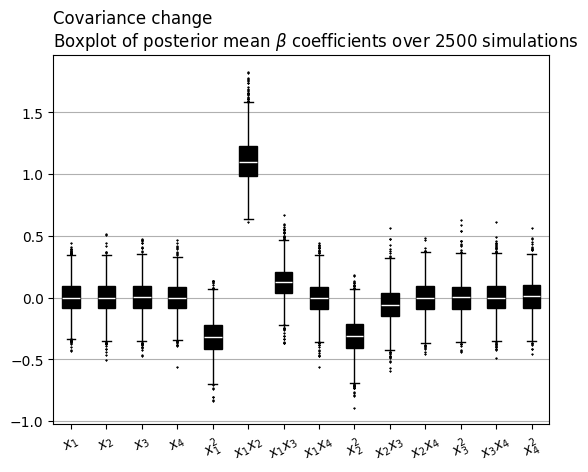

In [10]:
powers = np.array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [2, 0, 0, 0],
       [1, 1, 0, 0],
       [1, 0, 1, 0],
       [1, 0, 0, 1],
       [0, 2, 0, 0],
       [0, 1, 1, 0],
       [0, 1, 0, 1],
       [0, 0, 2, 0],
       [0, 0, 1, 1],
       [0, 0, 0, 2]])

names = [r'$x_1$', r'$x_2$', r'$x_3$', r'$x_4$', r'$x_1^2$', r'$x_1x_2$', r'$x_1x_3$', r'$x_1x_4$',
        r'$x_2^2$', r'$x_2x_3$', r'$x_2x_4$', r'$x_3^2$', r'$x_3x_4$', r'$x_4^2$']

fig, ax = plt.subplots()
ax.yaxis.grid(True)
bp = ax.boxplot(x=exp3A_df.iloc[:, 1:15].to_numpy(), labels=names, sym='*', patch_artist=True)
#17:31 in the second prior case...
plt.setp(bp['fliers'], markersize=1.0)
plt.xticks(rotation=30)
plt.setp(bp["boxes"], facecolor="black")
plt.setp(bp["medians"], color="white")
ax.set_title("Covariance change\nBoxplot of posterior mean "+str(r'$\beta$')+" coefficients over 2500 simulations", loc='left')
#plt.savefig("BoxplotCov.pdf")